In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt',
                           'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x2c920076fe0>)

In [3]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                           'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x2c920077700>)

In [4]:
# loading a fixed-width text file: we prescribe the widths of every field;
# the names of the resulting array columns; their datatypes. 'Uxx' stands
# for unicode string of length xx; 'd' for double precision floating point

stations = np.genfromtxt('stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                         names=['id','latitude','longitude','elevation','state','name',
                                                'gsn','hcn','wmo'],
                                         dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                         autostrip=True)

In [6]:
len(stations)

119503

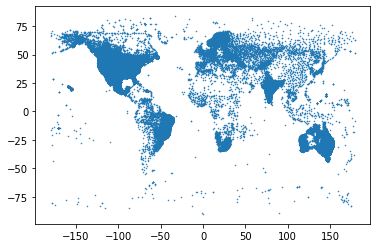

In [8]:
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

In [9]:
stations_md = stations[stations['state'] == 'MD']

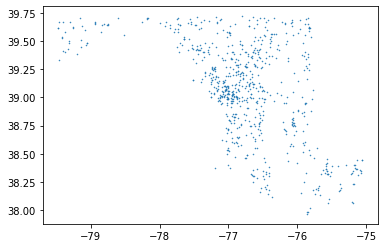

In [10]:
pp.plot(stations_md['longitude'], stations_md['latitude'], '.', markersize=1)

In [11]:
stations[stations['name'] == 'ROCKVILLE']

array([('ASN00040622', -28.15  , 152.5167, 229. , '', 'ROCKVILLE', '', '', ''),
       ('USC00066942',  41.8667, -72.4333, 155.4, 'CT', 'ROCKVILLE', '', '', ''),
       ('USC00127522',  39.7594, -87.2269, 210. , 'IN', 'ROCKVILLE', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

In [12]:
stations[np.char.find(stations['name'], 'ROCKVILLE') == 0]

array([('ASN00040622', -28.15  ,  152.5167,  229. , '', 'ROCKVILLE', '', '', ''),
       ('US10shem003',  41.1426,  -98.8593,  613. , 'NE', 'ROCKVILLE 2.2 NW', '', '', ''),
       ('US1INMY0009',  39.746 ,  -87.0611,  219.8, 'IN', 'ROCKVILLE 9.1 E', '', '', ''),
       ('US1INPR0003',  39.7891,  -87.1697,  214. , 'IN', 'ROCKVILLE 3.6 ENE', '', '', ''),
       ('US1MDMG0014',  39.0617,  -77.1676,  114.9, 'MD', 'ROCKVILLE 1.5 SSW', '', '', ''),
       ('US1MDMG0056',  39.1268,  -77.0865,  139. , 'MD', 'ROCKVILLE 4.8 NE', '', '', ''),
       ('US1MDMG0062',  39.0853,  -77.1873,  128.6, 'MD', 'ROCKVILLE 1.8 W', '', '', ''),
       ('US1MDMG0074',  39.0741,  -77.1463,  125.9, 'MD', 'ROCKVILLE 0.6 SE', '', '', ''),
       ('US1MDMG0113',  39.0958,  -77.0929,  122.2, 'MD', 'ROCKVILLE 3.4 ENE', '', '', ''),
       ('US1MDMG0115',  39.0937,  -77.2029,  136.9, 'MD', 'ROCKVILLE 2.8 WNW', '', '', ''),
       ('US1MNSR0040',  45.4613,  -94.3475,  338. , 'MN', 'ROCKVILLE 1.3 WSW', '', '', ''),
     

In [13]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00127522.dly', 'ROCKVILLE.dly')

('ROCKVILLE.dly', <http.client.HTTPMessage at 0x25a952d4e80>)

In [14]:
import getweather

In [15]:
help(getweather.getyear)

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.
    
    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



In [16]:
getweather.getyear('ROCKVILLE', ['TMIN','TMAX'], 2020)

array([( -4.4, 13.9), (  1.7,  9.4), (  1.7,  9.4), ( -1.1, 10. ),
       ( -7.2,  9.4), ( -7.2,  9.4), ( -6.7,  4.4), ( -6.7,  2.2),
       ( -6.7, 10. ), (  4.4, 11.1), (  0.6, 14.4), ( -3.9, 14.4),
       ( -1.7,  1.7), ( -3.3,  5.6), ( -3.3,  6.1), ( -8.3,  5.6),
       ( -9.4, -2.8), ( -9.4,  5.6), (-17.2, -2.8), (-14.4, -5. ),
       (-14.4, -1.7), ( -8.9, -1.1), ( -2.8,  3.9), ( -2.8,  3.9),
       ( -2.2,  1.1), ( -3.3,  2.8), ( -4.4,  2.8), ( -3.9, -1.7),
       ( -3.3, -1.7), ( -3.3,  0. ), ( -2.2,  2.2), ( -0.6,  2.2),
       ( -0.6, 15.6), ( -1.7, 17.8), ( -1.7, 17.8), ( -3.3, 17.8),
       ( -6.1, -3.3), ( -8.3, -0.6), ( -8.3, -0.6), ( -7.8, -0.6),
       ( -2.2,  3.9), ( -2.8,  3.9), ( -6.1,  0.6), (-12.2, -1.7),
       (-22.2, -1.7), (-17.8,  2.2), ( -2.8,  5. ), ( -3.3,  5. ),
       (  0.6,  7.2), ( -7.2,  0.6), ( -8.3,  0.6), (-14.4,  1.1),
       ( -9.4,  6.7), ( -9.4, 11.1), (  2.8,  8.9), (  0. ,  3.9),
       ( -3.9,  3.9), ( -7.2,  1.1), ( -8.3,  1.1), (-12.8,  1

In [20]:
rockville = getweather.getyear('ROCKVILLE', ['TMIN', 'TMAX'], 2020)

In [24]:
np.mean(rockville['TMIN']), np.min(rockville['TMIN']), np.max(rockville['TMIN'])

(nan, nan, nan)

In [25]:
np.sum(np.isnan(rockville['TMIN']))

1

In [26]:
np.nanmin(rockville['TMIN']), np.nanmax(rockville['TMAX'])

(-22.2, 34.4)

In [27]:
rockville['TMIN'][np.isnan(rockville['TMIN'])] = np.nanmean(rockville['TMIN'])
rockville['TMAX'][np.isnan(rockville['TMAX'])] = np.nanmean(rockville['TMAX'])

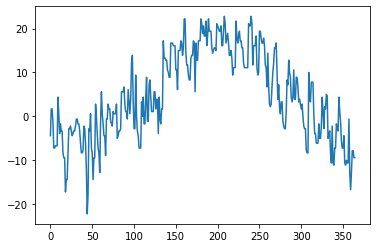

In [29]:
pp.plot(rockville['TMIN'])

In [30]:
rockville = getweather.getyear('ROCKVILLE', ['TMIN', 'TMAX'], 2020)

In [31]:
# build a Boolean mask of "good" (non-NaN) TMIN values;
# interpolate "good" days/TMIN to full range of days 

good = ~np.isnan(rockville['TMIN'])
x = np.arange(0, 365)

np.interp(x, x[good], rockville['TMIN'][good])

array([ -4.4,   1.7,   1.7,  -1.1,  -7.2,  -7.2,  -6.7,  -6.7,  -6.7,
         4.4,   0.6,  -3.9,  -1.7,  -3.3,  -3.3,  -8.3,  -9.4,  -9.4,
       -17.2, -14.4, -14.4,  -8.9,  -2.8,  -2.8,  -2.2,  -3.3,  -4.4,
        -3.9,  -3.3,  -3.3,  -2.2,  -0.6,  -0.6,  -1.7,  -1.7,  -3.3,
        -6.1,  -8.3,  -8.3,  -7.8,  -2.2,  -2.8,  -6.1, -12.2, -22.2,
       -17.8,  -2.8,  -3.3,   0.6,  -7.2,  -8.3, -14.4,  -9.4,  -9.4,
         2.8,   0. ,  -3.9,  -7.2,  -8.3, -12.8,  -1.1,   5.6,   0.6,
        -1.7,  -4.4,  -4.4,  -8.9,  -0.6,  -0.6,   2.8,   1.7,   1.7,
        -1.1,  -1.7,  -2.2,   1.1,   0.6,   0.6,   0.6,   2.8,  -5. ,
        -4.4,  -3.3,  -3.3,  -2.8,   5.6,   5.6,   5.6,   6.7,   2.8,
         1.1,   1.1,  -0.6,   6.1,   3.3,   0.6,   3.9,  12.2,  13.9,
         3.3,  -2.8,  -2.8,   9.4,   0. ,  -3.3,  -4.4,  -7.2,  -7.2,
        -7.2,   3.3,   0. ,   4.4,  -1.7,  -1.7,   4.4,   8.9,  -1.1,
        -1.1,   7.2,   8.3,   4.4,   1.1,   1.1,   1.1,   5.6,   5.6,
         1.7,   3.9,

In [32]:
# fill NaNs in any array by interpolation

def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(len(array))

    return np.interp(x, x[good], array[good])

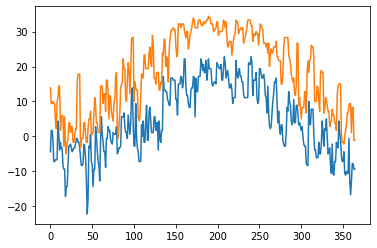

In [ ]:
pp.plot(fillnans(rockville['TMIN']))
pp.plot(fillnans(rockville['TMAX']))

In [38]:
rockville['TMIN'], rockville['TMAX'] = fillnans(rockville['TMIN']), fillnans(rockville['TMAX'])

In [39]:
np.mean(rockville['TMIN']), np.min(rockville['TMIN']), np.max(rockville['TMIN'])

(4.631506849315069, -22.2, 22.8)

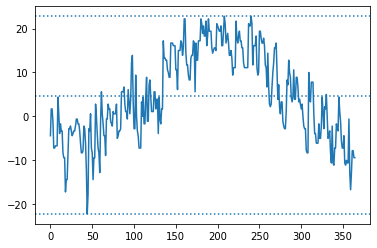

In [40]:
pp.plot(rockville['TMIN'])

# plot horizontal lines at mean, min, and max of TMIN data
for value in [np.mean(rockville['TMIN']), np.min(rockville['TMIN']), np.max(rockville['TMIN'])]:
    pp.axhline(value, linestyle=':')

In [41]:
mean, err = np.mean(rockville['TMIN']), math.sqrt(np.var(rockville['TMIN']))

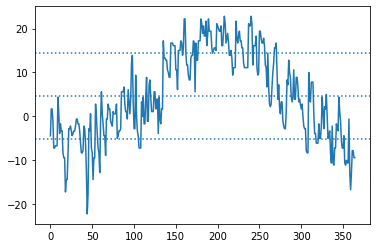

In [42]:
pp.plot(rockville['TMIN'])

# plot horizontal lines at mean, mean - std error, and mean + std error
for value in [mean, mean - err, mean + err]:
    pp.axhline(value, linestyle=':')

In [43]:
rain = getweather.getyear('ROCKVILLE', ['PRCP'], 2020)['PRCP']

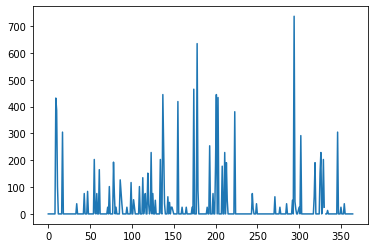

In [44]:
pp.plot(rain)

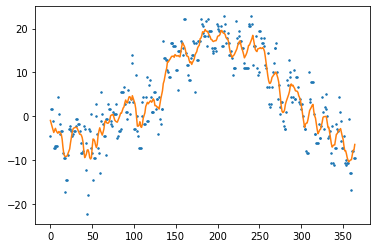

In [45]:
# TMIN data, smoothed with uniform mask of length 10;
# perform partial correlation on boundaries (mode = "same")

pp.plot(rockville['TMIN'], '.', ms=3)
pp.plot(np.correlate(rockville['TMIN'], np.ones(10)/10, 'same'))

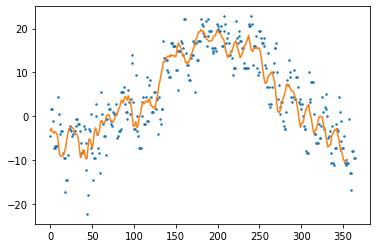

In [46]:
# TMIN data, smoothed with uniform mask of length 10;
# drop boundary values that cannot be fully correlated (mode = "valid")

pp.plot(rockville['TMIN'], '.', ms=3)
pp.plot(np.correlate(rockville['TMIN'], np.ones(10)/10, 'valid'))

In [47]:
# smooth any array

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

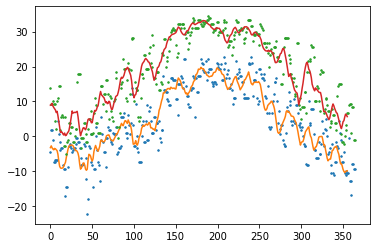

In [48]:
pp.plot(rockville['TMIN'], '.', ms=3)
pp.plot(smooth(rockville['TMIN'], 10))

pp.plot(rockville['TMAX'], '.', ms=3)
pp.plot(smooth(rockville['TMAX'], 10))

In [49]:
# load TMIN and TMAX data for a station and year; fill NaNs;
# plot unsmoothed data as dots, smoothed data as lines,
# dropping boundary values and adjusting x axis consistently

def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    for obs in ['TMIN','TMAX']:   
        stationdata[obs] = fillnans(stationdata[obs])
    
        # thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10,356), smooth(stationdata[obs], 20))
    
    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

(1.0, 365.0, 15.0, 30.0)

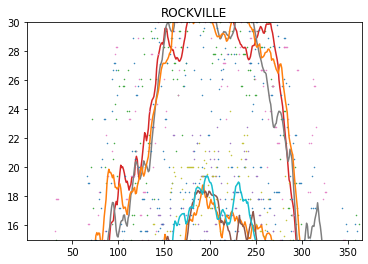

In [50]:
plotsmooth('ROCKVILLE', 2019)
plotsmooth('ROCKVILLE', 2020)
plotsmooth('ROCKVILLE', 2021)

pp.axis(ymin=15,ymax=30)

Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').


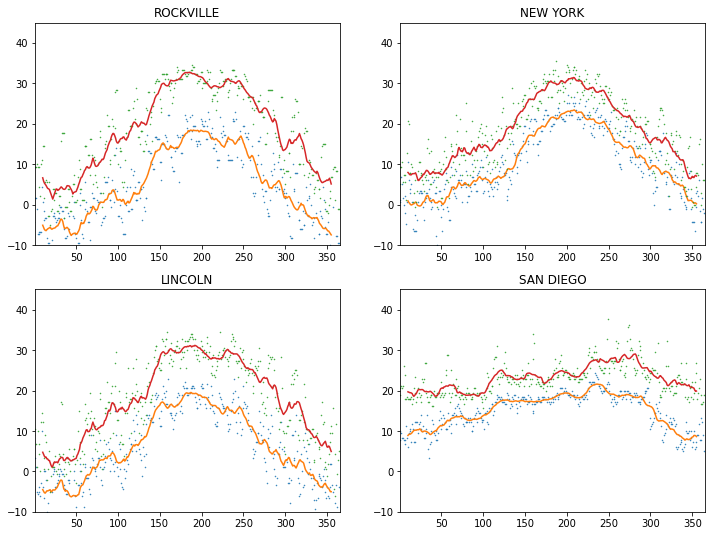

In [53]:
# plot four cities in a two-by-two grid

pp.figure(figsize=(12,9))

for i, city in enumerate(['ROCKVILLE','NEW YORK','LINCOLN','SAN DIEGO']):
    pp.subplot(2,2,i+1)
    plotsmooth(city, 2020)